In [1]:
from sklearn.datasets import load_wine
wine_data = load_wine()
data, target = wine_data.data, wine_data.target
columns = wine_data.feature_names

In [2]:
from sklearn.model_selection import train_test_split
train_input, test_input, train_target, test_target = train_test_split(data,
                                                                      target,
                                                                      stratify=target,
                                                                      test_size=0.2,
                                                                      random_state=42)
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
train_scaled = ss.fit_transform(train_input)
test_scaled = ss.transform(test_input)

In [16]:
import numpy as np
np.set_printoptions(precision=4)
mean_vecs = []
for label in range(3):
    mean_vecs.append(np.mean(train_scaled[train_target==label], axis=0))
    print('MV %s: %s' %(label, mean_vecs[label]))

MV 0: [ 0.9129 -0.252   0.3446 -0.7357  0.4534  0.8845  0.997  -0.5403  0.4813
  0.2101  0.4341  0.7709  1.1745]
MV 1: [-0.868  -0.3878 -0.482   0.2383 -0.349  -0.0876  0.0275 -0.0248  0.1311
 -0.8624  0.4477  0.2353 -0.7097]
MV 2: [ 0.1729  0.8935  0.2967  0.5525 -0.0373 -0.9626 -1.2743  0.7055 -0.792
  1.0338 -1.2085 -1.3064 -0.3881]


In [18]:
d = 13
S_W = np.zeros((d, d))
for label, mv in zip(range(3), mean_vecs):
    class_scatter = np.zeros((d, d))
    for row in train_scaled[train_target==label]:
        row, mv = row.reshape(d, 1), mv.reshape(d, 1)
        class_scatter+=(row-mv).dot((row-mv).T)
    S_W+=class_scatter
print(S_W.shape)

(13, 13)


In [28]:
d = 13
S_W = np.zeros((d, d))
for label, mv in zip(range(3), mean_vecs):
    class_scatter = np.cov(train_scaled[train_target==label].T)
    S_W+=class_scatter
print(S_W.shape)

(13, 13)


In [30]:
mean_overall = np.mean(train_scaled, axis=0)
mean_overall = mean_overall.reshape(d, 1)
d = 13
S_B = np.zeros((d, d))
for i, mean_vec in enumerate(mean_vecs):
    n = train_scaled[train_target==i, :].shape[0]
    mean_vec = mean_vec.reshape(d, 1)
    S_B+=n*(mean_vec-mean_overall).dot((mean_vec-mean_overall).T)
print(S_B.shape)

(13, 13)


In [69]:
eigen_vals, eigen_vecs = np.linalg.eig(np.linalg.inv(S_W).dot(S_B))
eigen_vals.shape, eigen_vecs.shape
eigen_pairs = [(np.abs(eigen_vals[i]), eigen_vecs[:, i]) for i in range(len(eigen_vals))]
eigen_pairs = sorted(eigen_pairs, key=lambda x: x[0], reverse=True)
for i in eigen_pairs:
    print(i[0])

493.92387694499564
212.24402626120403
5.979639928539304e-14
5.684341886080802e-14
3.7478400397057163e-14
2.623918057989143e-14
2.623918057989143e-14
1.4585796283369913e-14
1.2846700077268382e-14
1.2175212220884036e-14
1.2175212220884036e-14
4.072325885824939e-15
3.1204184652619695e-15


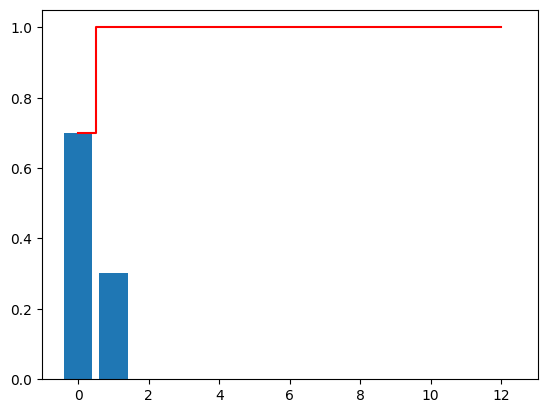

In [70]:
import matplotlib.pyplot as plt
tot = sum(eigen_vals.real)
discr = [(i/tot) for i in sorted(eigen_vals.real, reverse=True)]
cum_discr = np.cumsum(discr)
plt.bar(np.arange(13), discr, align='center')
plt.step(np.arange(13), cum_discr, where='mid', color='red')

In [72]:
w = np.hstack((eigen_pairs[0][1][:, np.newaxis].real,
               eigen_pairs[1][1][:, np.newaxis].real))
w

array([[-0.0766, -0.3389],
       [ 0.0771, -0.2866],
       [-0.0196, -0.3874],
       [ 0.1754,  0.3087],
       [-0.0242, -0.0052],
       [ 0.1873,  0.0062],
       [-0.8225,  0.1973],
       [-0.083 ,  0.0427],
       [ 0.07  ,  0.1827],
       [ 0.2512, -0.4034],
       [-0.0505,  0.1398],
       [-0.2817, -0.0297],
       [-0.2968, -0.548 ]])

In [73]:
train_lda = train_scaled.dot(w)

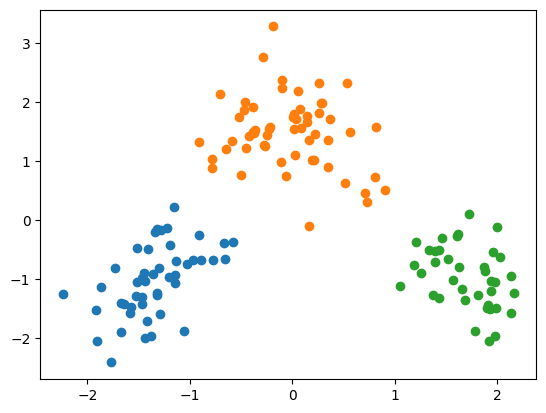

In [77]:
for i in range(len(np.unique(train_target))):
    plt.scatter(train_lda[train_target==i, 0],
                train_lda[train_target==i, 1])